# Assignment 2: recommender System

## Code from the lecture

In [1]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../../DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../../DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('../../DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [2]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

In [3]:
epsilon = 0.00000001
def CosineDist(a,b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b)+epsilon)

In [4]:
#again, implementation not efficient: better use lamda opperators 
D=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D[i,j]=CosineDist(R[:,i],R[:,j])
np.save("movie_file_1",D)


In [5]:
def getTopN(movie_id,D,N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title, D):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title), D))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

## Euclidische Distanz

In [6]:
epsilon_002 = 0.000000001
def EuclDist(a,b):
    return np.linalg.norm(a-b) +epsilon

## Erstellung Euclidische-Distanz Matrix

In [7]:
ED = np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            ED[i,j]=EuclDist(R[:,i],R[:,j])
#np.save("movie_file_2",ED)

## Euclidische Distanz-Matrix darstellen

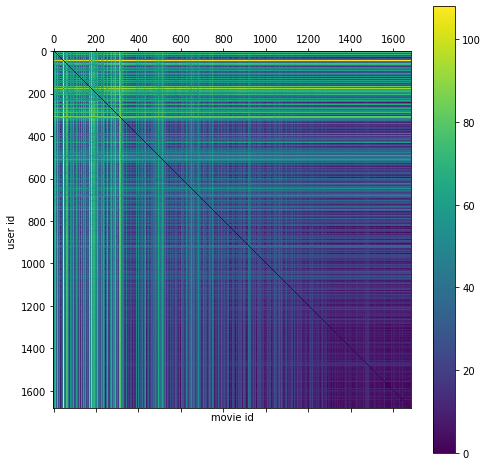

In [8]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(ED)
plt.xlabel('movie id')
plt.ylabel('user id ')
plt.colorbar() 
plt.show()

## Cosinus Distanz-Matrix darstellen

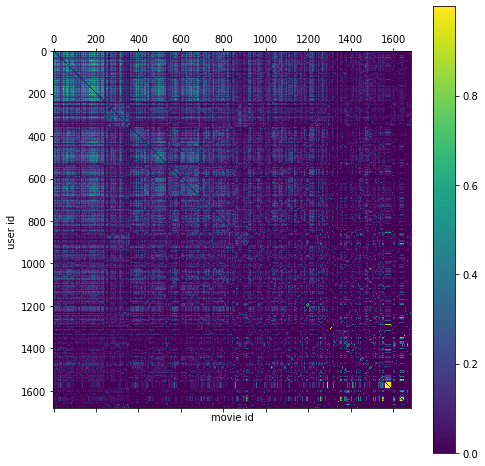

In [9]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D)
plt.xlabel('movie id')
plt.ylabel('user id ')
plt.colorbar() 
plt.show()

## Ausgangsdaten in Training und Testdaten 
### Frage: Warum sind die Testdaten so klein gehalten? bewusst?

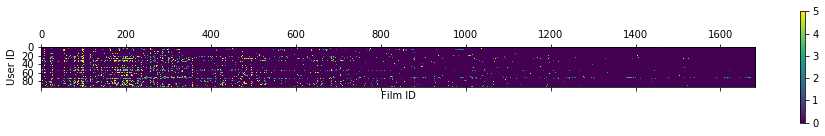

In [10]:
from sklearn.model_selection import train_test_split
R_train, R_test = train_test_split(R, test_size=0.1)
plt.matshow(R_test)
plt.xlabel('Film ID')
plt.ylabel('User ID')
plt.colorbar()
plt.show()

In [11]:
#D_train_ = D_train[:95]
#print(D_train_.shape)
#print(R_test.shape)

In [12]:
Score_byID(168,D, R_test[23])

(array([188, 407, 113, 167, 173], dtype=int64),
 188                              Grand Day Out, A (1992)
 407                                Close Shave, A (1995)
 113    Wallace & Gromit: The Best of Aardman Animatio...
 167               Monty Python and the Holy Grail (1974)
 173                       Raiders of the Lost Ark (1981)
 Name: title, dtype: object,
 array([0., 0., 0., 1., 3.]),
 0.8)

## Cosinus Distanz Trainingsdatern

In [13]:
#cosinus-Distanz6
k = 0
l = 0

D_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for k in range(0,np.shape(movies)[0]):
    for l in range(0,np.shape(movies)[0]):
        if k!=l:
            D_train[k,l]=CosineDist(R_train[:,k],R_train[:,l])
#np.save("cos_dis_train",D_train)

#print(type(k))
#print(type(l))

## Test Score  Cosinus-Distanz

In [14]:
resultD =test_Score(D_train,R_test)

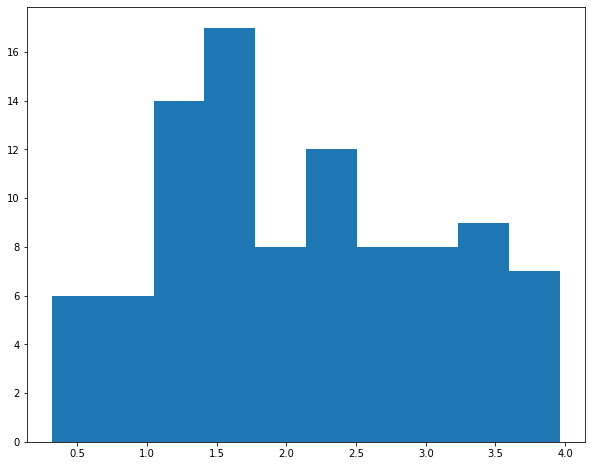

In [15]:
plt.hist(resultD)
plt.show()

## Euclidische Distanz Trainingsdaten

In [16]:
ED_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            ED_train[i,j]=EuclDist(R_train[:,i],R_train[:,j])

## Test Score  Euclidische Distanz

In [17]:
resultED = test_Score(ED_train,R_test)

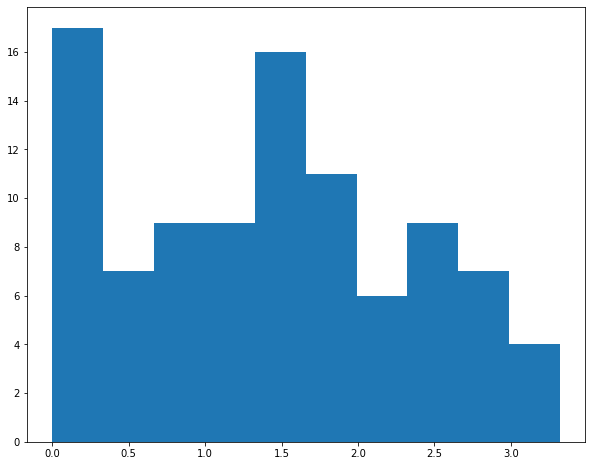

In [18]:
plt.hist(resultED)
plt.show()

## Mean Squared Error

In [19]:
error_Cosin= np.mean(resultD)
print("Mean Squared Error der Cosinus-Distanz: ",error_Cosin)

Mean Squared Error der Cosinus-Distanz:  2.103999999999999


In [20]:
error_Eucl = np.mean(resultED)
print("Mean Squared Error der Euclidischen-Distanz: ",error_Eucl)

Mean Squared Error der Euclidischen-Distanz:  1.4054736842105267


## 4.2 Baseline Results
*Implement and compare results of
* random recommendations
* allways recommending the top 5 movies (over all users)

In [21]:
CII("gr", D)

recommending movies for: '12 Angry Men (1957)'


198    Bridge on the River Kwai, The (1957)
196                    Graduate, The (1967)
190                          Amadeus (1984)
210                          M*A*S*H (1970)
479               North by Northwest (1959)
Name: title, dtype: object

In [22]:
CII("High", D)

recommending movies for: '3 Ninjas: High Noon At Mega Mountain (1998)'


813    Great Day in Harlem, A (1994)
856         Paris Was a Woman (1995)
829                  Power 98 (1995)
851         Bloody Child, The (1996)
847          Murder, My Sweet (1944)
Name: title, dtype: object

In [23]:
CII("Poke ", D)

no movie title containing Poke found...


## Top 5 Movies empfehlen

In [24]:
five_mov = np.sum(D, 1)
array_movie_sort = np.argsort(five_mov)[-5:]
print(array_movie_sort)


[ 78  55 171 173 203]


In [25]:
print(getNameByID(array_movie_sort))

78                Fugitive, The (1993)
55                 Pulp Fiction (1994)
171    Empire Strikes Back, The (1980)
173     Raiders of the Lost Ark (1981)
203          Back to the Future (1985)
Name: title, dtype: object


In [26]:
def TestScoreFive(Test):
    mov_id = array_movie_sort
    mov_title = getNameByID(mov_id)
    mov_score = Test[mov_id]
    return mov_id, mov_title, mov_score, np.mean(mov_score)

def TestTopFive(R_test):
    Scores=[]
    for i in range(R_test.shape[0]):
        ScoreUser=0
        Top = np.argsort(R_test[i])[-5:]
        for e in Top:
            res_id, res_title, res_score, av_score = TestScoreFive(R_test[i])
            ScoreUser+=av_score
        Scores.append(ScoreUser/(5))
    return Scores

In [28]:
TestTopFive=TestTopFive(R)
print(np.mean(TestTopFive))

1.618239660657476


## Test mit Pandas (5 Filme mit den meisten Bewertungen absteigend sortiert)

In [29]:
# creating dataframe with 'rating' count values
ratig = pd.DataFrame(ratings.groupby('movie_id')['rating'].mean()) 
  
ratig['num of ratings'] = pd.DataFrame(ratings.groupby('movie_id')['rating'].count())
ratig.sort_values('num of ratings', ascending = False).head(5)

,rating,num of ratings
movie_id,,
50,4.358491,583
258,3.803536,509
100,4.155512,508
181,4.007890,507
294,3.156701,485


## Most Rated Movies

In [30]:
topRatedMovies = ratings.groupby('movie_id')['rating'].count().sort_values(ascending=False).head()
getNameByID(topRatedMovies.values)

583             Secret Garden, The (1993)
509         Magnificent Seven, The (1954)
508                   My Left Foot (1989)
507    People vs. Larry Flynt, The (1996)
485                        Sabrina (1954)
Name: title, dtype: object

## 5 fixe Filme vorschlagen

In [31]:
five_films = np.random.randint(np.shape(D)[1], size=5) 

In [32]:
filme_fix = getNameByID(five_films)
print(filme_fix)

1650                   Spanish Prisoner, The (1997)
429                                Duck Soup (1933)
528     My Life as a Dog (Mitt liv som hund) (1985)
1325                                    Boys (1996)
1383                                 Squeeze (1996)
Name: title, dtype: object


## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $D$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct and evaluate $D'$


In [36]:
print(D)
print(D.shape)
U,S,V = np.linalg.svd(D)


[[0.         0.40238218 0.33024479 ... 0.         0.04718307 0.04718307]
 [0.40238218 0.         0.27306918 ... 0.         0.07829936 0.07829936]
 [0.33024479 0.27306918 0.         ... 0.         0.         0.09687505]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04718307 0.07829936 0.         ... 0.         0.         0.        ]
 [0.04718307 0.07829936 0.09687505 ... 0.         0.         0.        ]]
(1682, 1682)


In [37]:
print(U)

[[-0.04732606 -0.01485397  0.01710692 ... -0.03320633 -0.07709852
  -0.02683127]
 [-0.0442046  -0.02817456 -0.00874024 ...  0.01037844 -0.02276745
  -0.01173597]
 [-0.03099178 -0.01538773 -0.00099614 ... -0.01075306 -0.03056101
   0.02053746]
 ...
 [-0.00086959  0.00484583 -0.00268401 ... -0.00168333 -0.00644098
   0.00680988]
 [-0.00516609 -0.00164718  0.00114115 ... -0.01203374 -0.01327531
   0.00629676]
 [-0.00501757  0.00051215  0.00370972 ... -0.0316123  -0.00433746
   0.01458175]]


In [38]:
#von allen Zeilen nur die ersten 3 werte
print(U[:,:])
print(U[:,:3].shape)

[[-0.04732606 -0.01485397  0.01710692 ... -0.03320633 -0.07709852
  -0.02683127]
 [-0.0442046  -0.02817456 -0.00874024 ...  0.01037844 -0.02276745
  -0.01173597]
 [-0.03099178 -0.01538773 -0.00099614 ... -0.01075306 -0.03056101
   0.02053746]
 ...
 [-0.00086959  0.00484583 -0.00268401 ... -0.00168333 -0.00644098
   0.00680988]
 [-0.00516609 -0.00164718  0.00114115 ... -0.01203374 -0.01327531
   0.00629676]
 [-0.00501757  0.00051215  0.00370972 ... -0.0316123  -0.00433746
   0.01458175]]
(1682, 3)


In [39]:
S

array([1.92975815e+02, 5.07954113e+01, 4.48492805e+01, ...,
       4.84719751e-03, 3.25223848e-03, 8.77127114e-05])

In [40]:
V

array([[-0.04732606, -0.0442046 , -0.03099178, ..., -0.00086959,
        -0.00516609, -0.00501757],
       [-0.01485397, -0.02817456, -0.01538773, ...,  0.00484583,
        -0.00164718,  0.00051215],
       [ 0.01710692, -0.00874024, -0.00099614, ..., -0.00268401,
         0.00114115,  0.00370972],
       ...,
       [ 0.03320633, -0.01037844,  0.01075306, ...,  0.00168333,
         0.01203374,  0.0316123 ],
       [-0.07709852, -0.02276745, -0.03056101, ..., -0.00644098,
        -0.01327531, -0.00433746],
       [ 0.02683127,  0.01173597, -0.02053746, ..., -0.00680988,
        -0.00629676, -0.01458175]])

In [41]:
#D wieder serstellem
print(D)
np.allclose(D, np.dot(U[:1682,:]* S, V))

[[0.         0.40238218 0.33024479 ... 0.         0.04718307 0.04718307]
 [0.40238218 0.         0.27306918 ... 0.         0.07829936 0.07829936]
 [0.33024479 0.27306918 0.         ... 0.         0.         0.09687505]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04718307 0.07829936 0.         ... 0.         0.         0.        ]
 [0.04718307 0.07829936 0.09687505 ... 0.         0.         0.        ]]


True

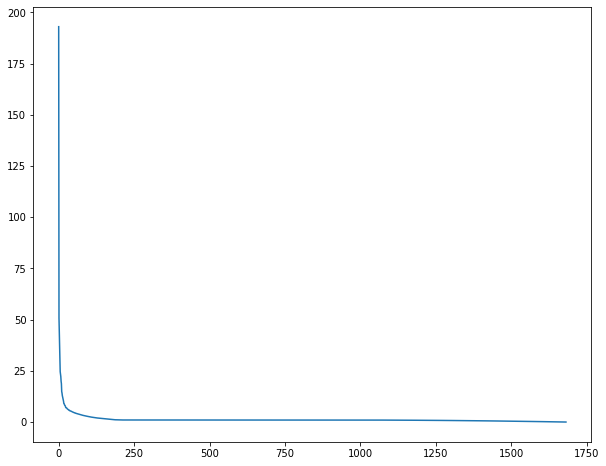

In [42]:
plt.plot(S)
plt.show()

In [43]:
#M[lower:upper:step]
erg = np.dot(U[:,:75]*S[:75],V[:75,:])

## Evaluieren

In [44]:
test_SVG_before= test_Score(D_train, R_test)

In [45]:
mean_test_before = np.mean(test_SVG_before)

In [46]:
test_SVG= test_Score(erg, R_test)

In [47]:
mean_test_svg = np.mean(test_SVG)

In [48]:
print("Mean Squared Error vor Cut: ",mean_test_before)
print("Mean Squared Error nach Cut: ",mean_test_svg)

Mean Squared Error vor Cut:  2.103999999999999
Mean Squared Error nach Cut:  2.8879999999999995


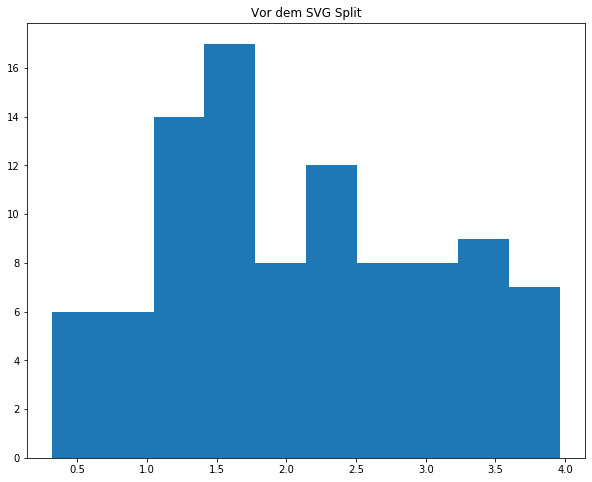

In [49]:
plt.title("Vor dem SVG Split")
plt.hist(test_SVG_before)
plt.show()


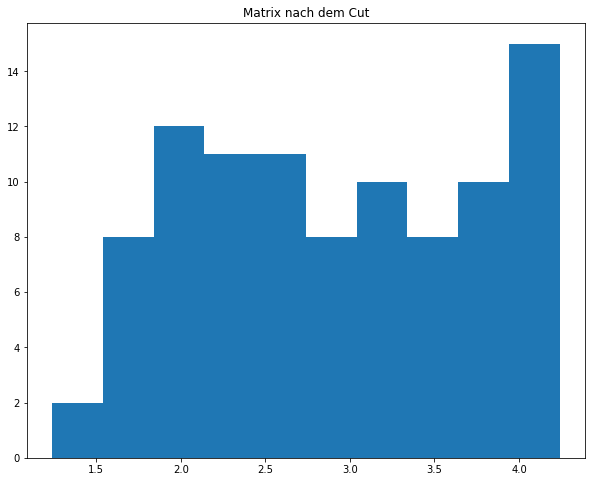

In [50]:
plt.title("Matrix nach dem Cut")
plt.hist(test_SVG)
plt.show()